# Assignment 1: Comparison of Regression Models on Predicting Medical Costs



### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the code repo if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
##  Task 1: SEE THE BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [0]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
def load_data():
    names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    csv_path = os.path.join("", "insurance.csv")
    return pd.read_csv(csv_path, delim_whitespace=False, names=names)

data = load_data()
data.drop(data.index[[0]],inplace=True)

print(data.head(10))
# print(data[data.isnull().any(axis=1)])

# data["sex"].value_counts()
data.describe()
# data.info()

   age     sex     bmi children smoker     region      charges
1   19  female    27.9        0    yes  southwest    16884.924
2   18    male   33.77        1     no  southeast    1725.5523
3   28    male      33        3     no  southeast     4449.462
4   33    male  22.705        0     no  northwest  21984.47061
5   32    male   28.88        0     no  northwest    3866.8552
6   31  female   25.74        0     no  southeast    3756.6216
7   46  female   33.44        1     no  southeast    8240.5896
8   37  female   27.74        3     no  northwest    7281.5056
9   37    male   29.83        2     no  northeast    6406.4107
10  60  female   25.84        0     no  northwest  28923.13692


,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,47,2,548,6,2,4,1337
top,18,male,32.3,0,no,southeast,1639.5631
freq,69,676,13,574,1064,364,2


Summary: The insurance dataset, which is 0.05432 MB with 1337 entries with 7 features, contains features that may affect the primary output we want to predict, the insurnace charges. The categorical data is only the sex and region features. As the method above shows, there are no null values. From this dataset, we could immediately see that smokers have much higher insurance charges than nonsmokers."

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING (25 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.


**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

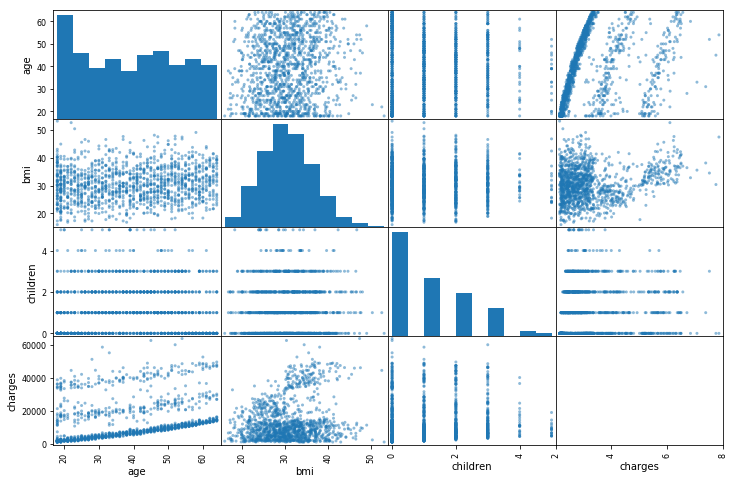

In [26]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt

# print(data)
# corr_matrix = data.corr()
# corr_matrix["charges"].sort_values(ascending=False)

data["age"] = data["age"].astype('float64')
data["charges"] = data["charges"].astype('float64')
data["children"] = data["children"].astype('float64')
data["bmi"] = data["bmi"].astype('float64')
data["charges"] = data["charges"].astype('float64')


# categorical_data = data[["sex", "smoker"]]
# ordinal_encoder = OrdinalEncoder()
# quan_data = ordinal_encoder.fit_transform(categorical_data)
# sex_quan = [i[0] for i in quan_data]
# smoker_quan = [i[1] for i in quan_data]
# data["sex"] = sex_quan
# data["smoker"] = smoker_quan
# print(data.corr()["charges"].sort_values(ascending=False))

attributes = ['age', 'bmi', 'children', 'charges', 'sex','smoker','region'] 
scatter_matrix(data[attributes], figsize=(12,8))
plt.axis([2,8,0,50])

#Reform the data
data = load_data()
data.drop(data.index[[0]],inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set2 = train_set.copy()
test_set2 = test_set.copy()

X_train = train_set.drop("charges",axis=1)
X_test = test_set.drop("charges",axis=1)
y_train = train_set2.drop("age",axis=1).drop("sex",axis=1).drop("bmi",axis=1).drop("children",axis=1).drop("smoker",axis=1).drop("region",axis=1)
y_test = test_set2.drop("age",axis=1).drop("sex",axis=1).drop("bmi",axis=1).drop("children",axis=1).drop("smoker",axis=1).drop("region",axis=1)
y_train.shape

(1070, 1)

In [0]:
from sklearn.compose import ColumnTransformer

cat_attribs = ["region", "sex", "smoker"]
num_attribs = list(X_train.drop(cat_attribs, axis= 1))

num_pipeline = Pipeline([
  ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])
X_train = full_pipeline.fit_transform(X_train)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

X_test = full_pipeline.fit_transform(X_test)
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]



- - -
## Task 3. IMPLEMENT GRADIENT DESCENT (30 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [30]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
  """
  Tweak parameters iteratively in order to minimize a loss function.
  Determined by a learning rate hyperparameter.
  Define what a linear regressor can do.
  Linear regressor is used for finding linear relationship between target 
  and one or more predictors. 
  y = theta(T)*x) --> MSE
  J(theta) = (X*theta - y)^T*(X*theta - Y)/m -->
  Gradient J(theta) = (2/m)*X^T * (X*Theta - Y) -->
  Theta = Theta - Alpha*(2/m)*X^T * (X*Theta - Y)
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = 0; # parameter vector;
    self.alpha = 0; # learning rate
    self.cost  = 0; # cost function

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    for x in range(X_train.shape[1]):
      X_train[x] = X_train[x].astype('float64')
    y_train["charges"] = y_train["charges"].astype('float64') 

    for iteration in range(iters):
      gradient = 2/(X_train.shape[0]) * X_train.T.dot(X_train.dot(theta) - y_train)
      theta = theta - alpha*gradient

    y_predict = X_train.dot(theta)
    cost = y_train - y_predict  

    self.theta = theta
    self.cost = cost
    return [self.theta, self.cost]

  def fitUsingGradientDescent(self, X_train, y_train, alpha, iterations):
    self.theta = np.random.randn(12,1)
    self.alpha = alpha
    iterations = iterations
    return self.gradientDescent(X_train, y_train, self.theta, self.alpha, iterations)

  def fitUsingNormalEquation(self, X_train, y_train):
    self.theta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    return self.theta

  def predict(self, X_test):
    # x.dot.theta
    y_predict = X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    print("Theta: ", self.theta)
    print("Alpha: ", self.alpha)
    print("Cost: ", self.cost)
    # implement here to return("Parameter vector is %f" % self.theta)   }
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
[theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.02,1000)
y_predict = myGradientDescentModel.predict(X_test)
print(y_predict[:10])
#myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    

[[ 9130.00095333]
 [ 7101.73520815]
 [37000.82611328]
 [ 9629.3958443 ]
 [26939.33296706]
 [10736.53782993]
 [  265.07036827]
 [16895.79881996]
 [ 1280.25901976]
 [11360.03332523]]


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

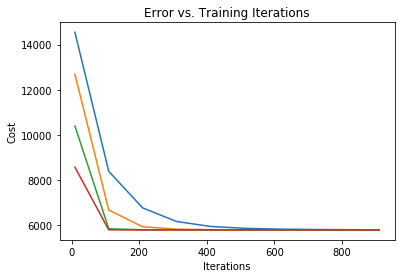

In [33]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.

# Learning rate = 0.01
y_values = []
x_values = []
for x in range(10, 1000,100):
  [theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.01, x)
  y_predict = myGradientDescentModel.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_predict, y_test))
  y_values.append(rmse)
  x_values.append(x)

plt.plot(x_values, y_values)

# Learning rate = 0.02
y_values = []
x_values = []
for x in range(10, 1000,100):
  [theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.02, x)
  y_predict = myGradientDescentModel.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_predict, y_test))
  y_values.append(rmse)
  x_values.append(x)

plt.plot(x_values, y_values)

# Learning rate = 0.05
y_values = []
x_values = []
for x in range(10, 1000,100):
  [theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.05, x)
  y_predict = myGradientDescentModel.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_predict, y_test))
  y_values.append(rmse)
  x_values.append(x)

plt.plot(x_values, y_values)

# Learning rate = 0.10
y_values = []
x_values = []
for x in range(10, 1000,100):
  [theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, 0.1, x)
  y_predict = myGradientDescentModel.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_predict, y_test))
  y_values.append(rmse)
  x_values.append(x)

plt.plot(x_values, y_values)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  
plt.show()

Red - alpha(0.01)
Green - alpha(0.02)
Orange - alpha(0.05)
Blue - alpha(0.1)

Conclusion: lower learning rate performed better!

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [34]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
myNormalEquationModel.predict(X_test)

array([[ 9.12994956e+03],
       [ 7.10195964e+03],
       [ 3.70013073e+04],
       [ 9.62949077e+03],
       [ 2.69398380e+04],
       [ 1.07366711e+04],
       [ 2.65220553e+02],
       [ 1.68960444e+04],
       [ 1.28014651e+03],
       [ 1.13601591e+04],
       [ 2.82565980e+04],
       [ 9.45471764e+03],
       [ 5.30520209e+03],
       [ 3.83643782e+04],
       [ 4.01977350e+04],
       [ 3.70756918e+04],
       [ 1.51716026e+04],
       [ 3.59020301e+04],
       [ 9.21630419e+03],
       [ 3.15546231e+04],
       [ 4.03706450e+03],
       [ 1.01844690e+04],
       [ 2.35793774e+03],
       [ 7.00650677e+03],
       [ 1.14537482e+04],
       [ 1.30016097e+04],
       [ 1.45307633e+04],
       [ 6.22580621e+03],
       [ 1.01096026e+04],
       [ 2.16640898e+03],
       [ 9.24771800e+03],
       [ 1.31324774e+04],
       [ 4.49303350e+03],
       [ 3.62381479e+03],
       [ 4.48919354e+03],
       [ 1.29533311e+04],
       [ 2.04652305e+03],
       [ 8.88466039e+03],
       [ 3.3

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [0]:
#Testing for best alpha value and getting the lowest RMSE
from sklearn.metrics import mean_squared_error

x_values2 = []
y_values2 = []

for x in np.arange(0.0, 0.5, 0.02):
  [theta, cost] = myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, x, 1000)
  y_predict = myGradientDescentModel.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_predict, y_test))
  x_values2.append(x)
  y_values2.append(rmse)
myGradientDescentModel_rmse = min(y_values2)

In [0]:
#Getting the Normal Equation Model 
from sklearn.metrics import mean_squared_error

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
y_predict = myNormalEquationModel.predict(X_test)
myNormalEquationModel_rmse = np.sqrt(mean_squared_error(y_predict, y_test))

In [37]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor() #stochastic --> one example at a time
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)

print("SGDModel: ", mySGDModel_rmse)
print("GDModel: ",myGradientDescentModel_rmse)
print("NMModel: ",myNormalEquationModel_rmse)



SGDModel:  5798.512554230487
GDModel:  5795.332533018757
NMModel:  5795.332533018759


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- - -
## Task 6. PRESENT YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

This project incorporates a concept called Gradient Descent, which allows us to minimize error when making predictions in the insurance charges, given different data such as age, bmi, sex, smoker or not, etc. And we experiment this method by testing it against another known method called SGD, to see it how well our method performed. We have learned that setting learning curve low and running more iterations on the method helped to reduce error significantly. We have also learned that whether the patient is smoker or not has one of the biggest correlations to the insurance charges. Some insights to moving forward is to test different learning rates for our method, and finding other variables that could affect the insurance charges, to better predict the charges, only given the factors that could affect the magnitude of the insurance charges.



- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!